<a href="https://colab.research.google.com/github/Mahreen11/machinelearning/blob/main/Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the dependencies

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as pt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import accuracy_score

Data Collection and Processing

In [ ]:
car_dataset = pd.read_csv('car data.csv')

In [ ]:
car_dataset.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
car_dataset.shape

(301, 9)

In [ ]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
car_dataset['Fuel_Type'].value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [ ]:
print(car_dataset['Seller_Type'].value_counts())
print(car_dataset['Transmission'].value_counts())

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [ ]:
#encode the data

In [ ]:
car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [ ]:
car_dataset.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


Splitting the data into training data and test data

In [ ]:
X = car_dataset.drop(['Car_Name','Selling_Price'],axis=1)
Y = car_dataset['Selling_Price']

In [ ]:
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [ ]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.1,random_state=2)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(270, 7)
(270,)
(31, 7)
(31,)


Linear Regression Model

In [ ]:
#loading the linear regression model
lin_reg = LinearRegression()

In [ ]:
lin_reg.fit(X_train,y_train)

LinearRegression()

Model Evaluation

In [ ]:
#prediction on training data
train_predict = lin_reg.predict(X_train)

In [ ]:
from sklearn import metrics

In [ ]:
#r squared error
error_score = metrics.r2_score(y_train,train_predict)
print(error_score)

0.8799451660493711


Visualize actual and predicted prices

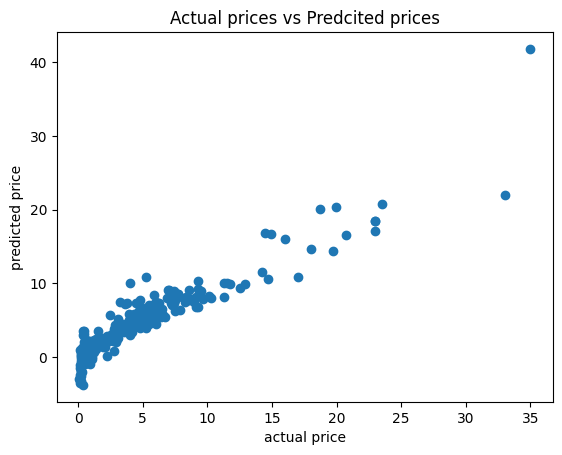

In [ ]:
pt.scatter(y_train,train_predict)
pt.xlabel('actual price')
pt.ylabel('predicted price')
pt.title('Actual prices vs Predcited prices')
pt.show();

In [ ]:
test_predict = lin_reg.predict(X_test)

In [ ]:
error_test_score = metrics.r2_score(y_test,test_predict)
print('R2 score: ',error_test_score)

R2 score:  0.8365766715027051


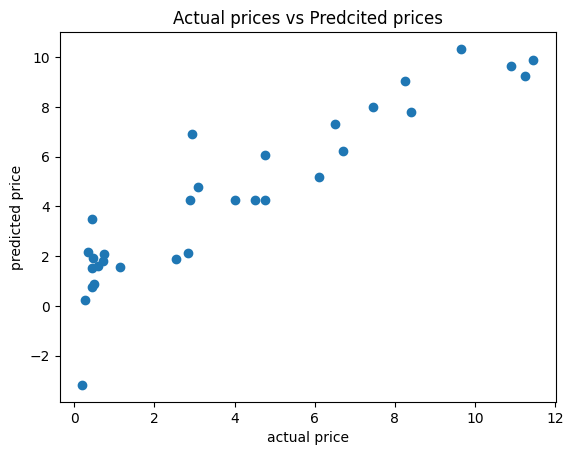

In [ ]:
pt.scatter(y_test,test_predict)
pt.xlabel('actual price')
pt.ylabel('predicted price')
pt.title('Actual prices vs Predcited prices')
pt.show();

Lasso Regression

In [ ]:
lasso_reg = Lasso()

In [ ]:
lasso_reg.fit(X_train,y_train)

Lasso()

In [ ]:
train_predict_lasso = lasso_reg.predict(X_train)

In [ ]:
X_train_predict_lasso = lasso_reg.predict(X_train)
error_score_train_lasso = metrics.r2_score(y_train,X_train_predict_lasso)

In [ ]:
print(error_score_train_lasso)

0.8427856123435794


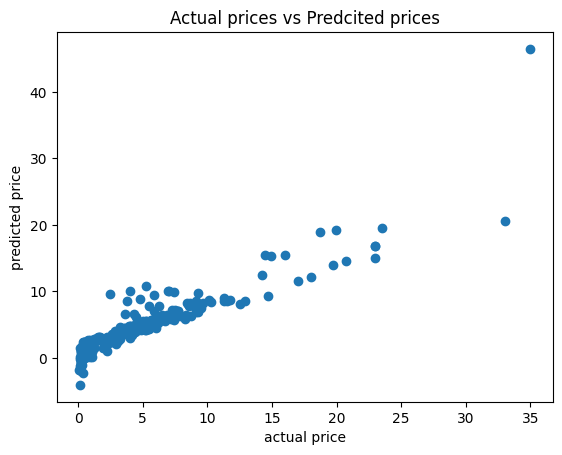

In [ ]:
pt.scatter(y_train,X_train_predict_lasso)
pt.xlabel('actual price')
pt.ylabel('predicted price')
pt.title('Actual prices vs Predcited prices')
pt.show();

In [ ]:
test_predict = lasso_reg.predict(X_test)

In [ ]:
error_test_score = metrics.r2_score(y_test,test_predict)
print('R2 score: ',error_test_score)

R2 score:  0.8709167941173195


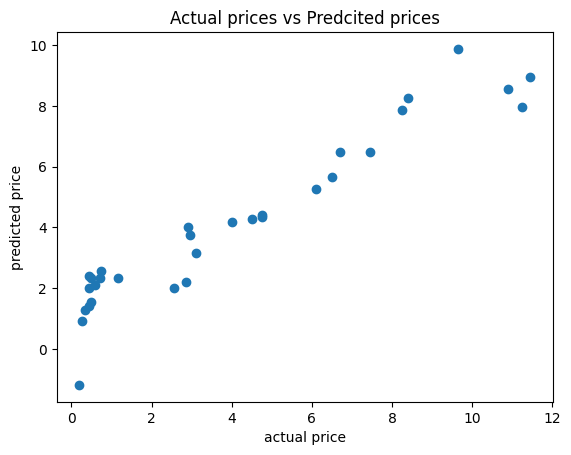

In [ ]:
pt.scatter(y_test,test_predict)
pt.xlabel('actual price')
pt.ylabel('predicted price')
pt.title('Actual prices vs Predcited prices')
pt.show();